<h1 style="font-size:36px;">Data exploration of synthetic data generated from INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of "operations_mostlyai.csv"  which is essentailly a synthetic version of original "operations.csv" from INSPIRE is shown</h2>

link to mostly.ai: https://synthetic.mostly.ai/d/jobs 

link to INSPIRE dataset: https://physionet.org/content/inspire/0.1/

A full list of the ICD-10-CM codes and the description can be found on the Centers for Disease Control and Prevention (CDC) website 
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/April-1-2023-Update/icd10cm-code%20descriptions-%20April%201%202023.zip.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels

print("Libraries Imported")

Libraries Imported


In [2]:
df_sgd_operations_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\operations_mostlyai_a4cd19-synthetic-CSV - Synthetic Data by MOSTLY AI\\operations_mostlyai\\operations_mostlyai.csv')

In [3]:
df_operations = df_sgd_operations_original.copy()

In [4]:
df_operations.head()

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,475566718,171577851,241843976,NaN,11020,75,M,65.0,175.0,Asian,...,10679,14310,12573,9975.0,9670.0,NaN,NaN,NaN,NaN,NaN
1,484647286,199842522,234339534,4929.0,3520,55,F,68.0,169.0,Asian,...,3811,0,9489,3588.0,3835.0,NaN,NaN,3836.0,5154.0,NaN
2,444866901,157372538,253734319,NaN,4620,70,M,71.0,173.0,Asian,...,5164,0,10482,5009.0,5196.0,NaN,NaN,NaN,NaN,NaN
3,445758955,138629067,244624747,NaN,2830,50,F,56.0,159.0,Asian,...,2102,0,5627,2073.0,2107.0,NaN,NaN,NaN,NaN,NaN
4,445865239,114308752,201252994,NaN,2850,55,F,73.0,158.0,Asian,...,2604,0,7595,2457.0,2579.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131109 entries, 0 to 131108
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   op_id              131109 non-null  int64  
 1   subject_id         131109 non-null  int64  
 2   hadm_id            131109 non-null  int64  
 3   case_id            20311 non-null   float64
 4   opdate             131109 non-null  int64  
 5   age                131109 non-null  int64  
 6   sex                131109 non-null  object 
 7   weight             129575 non-null  float64
 8   height             130330 non-null  float64
 9   race               131109 non-null  object 
 10  asa                127141 non-null  float64
 11  emop               131109 non-null  int64  
 12  department         131109 non-null  object 
 13  antype             131109 non-null  object 
 14  icd10_pcs          131109 non-null  object 
 15  orin_time          131109 non-null  int64  
 16  or

In [6]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time'],
      dtype='object')

In [7]:
df_operations.describe()

,op_id,subject_id,hadm_id,case_id,opdate,age,weight,height,asa,emop,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
count,1.311090e+05,1.311090e+05,1.311090e+05,20311.000000,1.311090e+05,131109.000000,129575.000000,130330.000000,127141.000000,131109.000000,...,1.311090e+05,1.311090e+05,1.311090e+05,1.311080e+05,1.310410e+05,2.635000e+03,2.633000e+03,1.710500e+04,1.709600e+04,1.312000e+03
mean,4.502004e+08,1.501893e+08,2.500417e+08,2447.888681,2.364801e+05,55.650260,62.819201,162.520502,1.771089,0.093182,...,2.392154e+05,2.330286e+05,2.479141e+05,2.388943e+05,2.389559e+05,2.173970e+05,2.182593e+05,2.371402e+05,2.417418e+05,8.653029e+05
std,2.890589e+07,2.887928e+07,2.881581e+07,20971.441338,6.807004e+05,16.206132,12.389208,27.109188,0.638974,0.290688,...,6.936495e+05,6.818562e+05,6.851572e+05,6.934444e+05,6.926712e+05,7.166954e+05,7.180792e+05,6.937616e+05,6.960523e+05,1.123870e+06
min,4.000040e+08,1.000023e+08,2.000068e+08,-32750.000000,0.000000e+00,20.000000,-1.000000,3.000000,1.000000,0.000000,...,1.150000e+02,0.000000e+00,1.435000e+03,1.500000e+01,1.050000e+02,7.950000e+02,9.650000e+02,4.300000e+01,8.370000e+02,1.414000e+03
25%,4.251196e+08,1.252255e+08,2.250865e+08,-19881.500000,2.070000e+03,45.000000,54.000000,156.000000,1.000000,0.000000,...,2.221000e+03,0.000000e+00,6.653000e+03,2.090000e+03,2.226000e+03,4.893000e+03,5.050000e+03,3.363000e+03,5.092000e+03,7.864575e+04
50%,4.503200e+08,1.503283e+08,2.501955e+08,8006.000000,3.160000e+03,60.000000,62.000000,162.000000,2.000000,0.000000,...,3.526000e+03,0.000000e+00,1.207800e+04,3.360000e+03,3.532000e+03,7.812000e+03,8.047000e+03,5.119000e+03,8.127000e+03,3.146850e+05
75%,4.753116e+08,1.752130e+08,2.749596e+08,20359.500000,1.254000e+04,70.000000,70.000000,168.000000,2.000000,0.000000,...,1.279300e+04,0.000000e+00,3.688900e+04,1.250825e+04,1.275600e+04,1.526100e+04,1.558500e+04,2.062500e+04,3.238400e+04,1.356918e+06
max,4.999955e+08,1.999977e+08,2.999979e+08,32758.000000,5.106890e+06,90.000000,172.000000,1528.000000,6.000000,1.000000,...,5.109987e+06,5.085540e+06,5.184437e+06,5.113609e+06,5.114705e+06,4.584902e+06,4.573281e+06,4.874615e+06,4.878425e+06,4.515220e+06


Op id

Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively).

In [8]:
unique_subject_ids = df_operations['op_id'].nunique()
print(unique_subject_ids)

131030


In [9]:
unique_icd10_pcs_values = df_operations['op_id'].unique()
print(unique_icd10_pcs_values[:30])

[475566718 484647286 444866901 445758955 445865239 477269323 435602742
 479644047 434942844 409283951 410924225 418771504 410343930 439039023
 463347320 461258519 476666835 496012352 413793745 408010111 494295458
 480035857 491359973 497915238 492215057 447717457 408622139 454533071
 405325535 492177531]


Subject id

Each table can be connected using subject_id. A subject_id may be matched to one or more hadm_ids. A single hadm_id may be matched with one or more op_ids. 
We did not extract these variables except for the medical record number, which was subsequently substituted with unique random integers as the subject id (described as subject_id). Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively). To allow identifiers to be easily distinguished, subject_id begin with “1”, hadm_id begin with “2”, and and op_id, respectively begin with “4”.

In [10]:
unique_subject_ids = df_operations['subject_id'].nunique()
print(unique_subject_ids)

131017


In [11]:
unique_subject_id = df_operations['subject_id'].unique()
print(unique_subject_id[:30])

[171577851 199842522 157372538 138629067 114308752 168395939 115643709
 118323634 144334157 174707479 189376549 177514832 169257722 106563384
 199296356 128019302 173268022 165486739 156308623 148416862 109849330
 141859736 140919518 143814056 153822752 126333765 185281173 146240841
 198508261 167123353]


In [12]:
top_10_subject_id = df_operations['subject_id'].value_counts().head(30)
print(top_10_subject_id)

subject_id
169928828    2
196705675    2
189557553    2
157016862    2
199219664    2
121714019    2
169298191    2
170208794    2
181309357    2
186973342    2
173974759    2
106919429    2
185844753    2
101171171    2
166351051    2
170485473    2
119758138    2
160953145    2
114785719    2
172613743    2
189365415    2
176067393    2
140679391    2
116159794    2
105189136    2
126662545    2
113008592    2
111969809    2
114697830    2
180049566    2
Name: count, dtype: int64


Hadm_id

In [13]:
unique_hadm_id = df_operations['hadm_id'].nunique()
print(unique_hadm_id)

131030


In [14]:
unique_hadm_id = df_operations['hadm_id'].unique()
print(unique_hadm_id[:30])

[241843976 234339534 253734319 244624747 201252994 221810544 267091297
 274698412 220468120 241392362 292515238 263602493 252570601 273334612
 293058841 212819373 220871957 233598169 222174081 228398401 272470237
 283626615 247796190 256177531 240724395 227615683 200401553 297204335
 296789447 272506030]


In [15]:
top_10_hadm_id = df_operations['hadm_id'].value_counts().head(30)
print(top_10_hadm_id)

hadm_id
280029516    2
278495496    2
220726419    2
235078607    2
236686787    2
284127436    2
242367099    2
245752132    2
281218074    2
220354628    2
218369533    2
264150642    2
246756653    2
256906425    2
253547278    2
252175422    2
291961450    2
225779208    2
251066918    2
247558211    2
205310569    2
284767999    2
214787229    2
254318480    2
228703685    2
290026889    2
235910800    2
210380695    2
256917501    2
249443595    2
Name: count, dtype: int64


ICS-10-PCS

 Operation names were converted to the first four codes of ICD-10-PCS

In [16]:
unique_subject_ids = df_operations['icd10_pcs'].nunique()
print(unique_subject_ids)

896


In [17]:
unique_icd10_pcs_values = df_operations['icd10_pcs'].unique()
print(unique_icd10_pcs_values[:30])

['08DJ3' '0BTC4' '0TC00' '08R43' '09BC0' '09Q70' '0UT94' '02110' '0VBF0'
 '0TY00' '0DTP0' '0XH94' '0BBD4' '0UT90' '0GTK0' '0XH80' '03LG0' '0PHH0'
 '0FT44' '0BBG4' '08QK3' '10D00' '0VB04' '0WQN0' '_RARE_' '0HC0X' '00BT0'
 '0VB07' '09BB0' '0HBU0']


In [18]:
top_10_icd10_pcs = df_operations['icd10_pcs'].value_counts().head(30)
print(top_10_icd10_pcs)


icd10_pcs
08DJ3     7087
09Q70     3361
0GTK0     3240
08R43     3049
0HBU0     2966
0FT44     2965
0HBT0     2860
10D00     2473
0DB64     2298
0TBB8     1958
08RJ3     1795
08RK3     1747
_RARE_    1639
00B00     1619
0DTP0     1516
0TBB7     1488
0WQN0     1409
0UJD8     1342
09B00     1275
0UT94     1270
0VT00     1265
009T0     1246
0VB08     1205
0WJG0     1130
0RG00     1108
0DTP4     1067
03VG3     1018
09QM0      995
0YQ50      990
0HD0X      937
Name: count, dtype: int64


C:\Users\20181588\AppData\Local\Temp\ipykernel_28284\2299865560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")


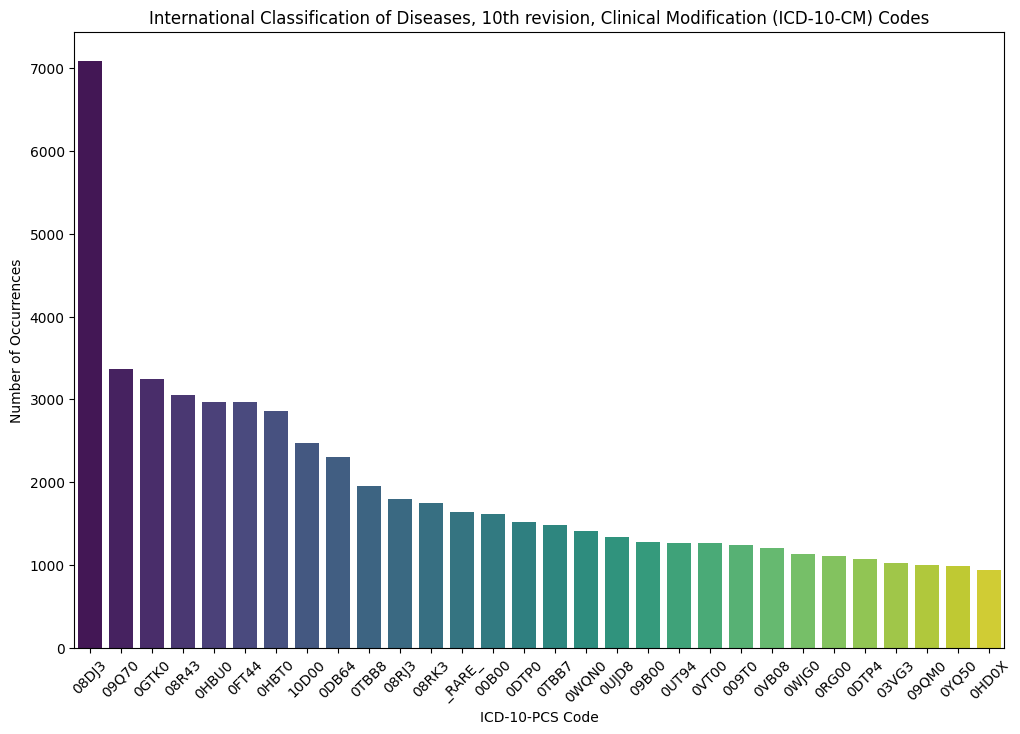

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 ICD-10-PCS codes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("International Classification of Diseases, 10th revision, Clinical Modification (ICD-10-CM) Codes")
plt.ylabel("Number of Occurrences")
plt.xlabel("ICD-10-PCS Code")
plt.show()

Department

In [20]:
unique_department = df_operations['department'].nunique()
print(unique_department)

15


In [21]:
unique_department = df_operations['department'].unique()
print(unique_department[:16])

['OT' 'CTS' 'UR' 'OL' 'GS' 'OG' 'OS' 'RAD' 'NS' 'PS' 'AN' 'PED' 'IM'
 '_RARE_' 'RO']


In [22]:
top_10_department  = df_operations['department'].value_counts().head(16)
print(top_10_department )

department
GS        34758
OT        17296
OS        17080
UR        12835
OG        12474
OL        11399
NS        10539
CTS        8846
PS         5302
RAD         363
IM          114
AN           58
PED          28
RO           14
_RARE_        3
Name: count, dtype: int64


OG: Obstetrics and Gynecology
GS: General Surgery
OS: Orthopedic Surgery
OT: Occupational Therapy (though in a department context, this might mean something else)
CTS: Cardiothoracic Surgery
UR: Urology
OL: Otolaryngology (Ear, Nose, and Throat or ENT)
NS: Neurosurgery or Neurological Surgery
PS: Plastic Surgery
EM: Emergency Medicine
AN: Anesthesiology
RO: Radiation Oncology
IM: Internal Medicine
PED: Pediatrics
DM:  Dhermathology
RAD: Radiology

Anaesthesia type

In [23]:
unique_antype = df_operations['antype'].nunique()
print(unique_antype)

4


In [24]:
unique_antype = df_operations['antype'].unique()
print(unique_antype[:4])

['MAC' 'General' 'Neuraxial' 'Regional']


In [25]:
top_10_antype= df_operations['antype'].value_counts().head(4)
print(top_10_antype)

antype
General      102717
MAC           15262
Neuraxial     12993
Regional        137
Name: count, dtype: int64


Duration of stay time is dischage time (all tines are shown in minutes)

In [26]:
print(df_operations['admission_time'] [:15])

0       14310
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9     3460460
10     687260
11    1011010
12          0
13          0
14          0
Name: admission_time, dtype: int64


In [27]:
print(df_operations['discharge_time'] [:15])

0       12573
1        9489
2       10482
3        5627
4        7595
5        7149
6        9892
7       18924
8        1435
9     3481956
10     699739
11    1030841
12       1435
13       6905
14       9065
Name: discharge_time, dtype: int64


Duration of anesthesia

In [28]:
print(df_operations['anstart_time'] [:15])

0        9975.0
1        3588.0
2        5009.0
3        2073.0
4        2457.0
5        2311.0
6        1911.0
7        3364.0
8         400.0
9     3573816.0
10     740541.0
11     906891.0
12        573.0
13       2481.0
14       3752.0
Name: anstart_time, dtype: float64


In [29]:
print(df_operations['anend_time'] [:15])

0        9670.0
1        3835.0
2        5196.0
3        2107.0
4        2579.0
5        2433.0
6        2114.0
7        3971.0
8         317.0
9     3056822.0
10     685966.0
11    1077607.0
12        593.0
13       2524.0
14       4000.0
Name: anend_time, dtype: float64


In [30]:
df_operations['an_duration'] = df_operations['anend_time'] - df_operations['anstart_time']
print(df_operations['an_duration'] [:15])

0       -305.0
1        247.0
2        187.0
3         34.0
4        122.0
5        122.0
6        203.0
7        607.0
8        -83.0
9    -516994.0
10    -54575.0
11    170716.0
12        20.0
13        43.0
14       248.0
Name: an_duration, dtype: float64


In [31]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration'],
      dtype='object')

Duration of operation

In [32]:
print(df_operations['opstart_time'] [:15])

0       10644
1        3642
2        5042
3        2065
4        2499
5        2325
6        1969
7        3409
8         575
9     3297534
10     664443
11    1119389
12        554
13       2463
14       3800
Name: opstart_time, dtype: int64


In [33]:
print(df_operations['opend_time'] [:15])

0       10679
1        3811
2        5164
3        2102
4        2604
5        2403
6        2092
7        3985
8         534
9     3126849
10     649681
11    1138027
12        589
13       2495
14       3995
Name: opend_time, dtype: int64


In [34]:
df_operations['op_duration'] = df_operations['opend_time'] - df_operations['opstart_time']
print(df_operations['op_duration'] [:15])

0         35
1        169
2        122
3         37
4        105
5         78
6        123
7        576
8        -41
9    -170685
10    -14762
11     18638
12        35
13        32
14       195
Name: op_duration, dtype: int64


In [35]:
unique_op_time = df_operations['op_duration'].unique()
print(unique_op_time)

[   35   169   122 ... 12500 60477 14132]


In [36]:
top_10_op_time= df_operations['op_duration'].value_counts().head(10)
print(top_10_op_time)

op_duration
53    599
58    594
57    593
56    589
46    575
66    573
55    573
70    572
52    561
48    560
Name: count, dtype: int64


In [37]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration'],
      dtype='object')

Duration of Cardiopumonary bypass

In [38]:
print(df_operations['cpbon_time'] [:15])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7     3600.0
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
Name: cpbon_time, dtype: float64


In [39]:
unique_cpbon_time = df_operations['cpbon_time'].unique()
print(unique_cpbon_time)

[   nan  3600. 20652. ... 25513. 13959.  7833.]


In [40]:
print(df_operations['cpboff_time'] [:15])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7     3965.0
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
Name: cpboff_time, dtype: float64


In [41]:
df_operations['cpb_duration'] = df_operations['cpboff_time'] - df_operations['cpbon_time']
print(df_operations['cpb_duration'] [:15])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7     365.0
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
Name: cpb_duration, dtype: float64


In [42]:
unique_cpb_time = df_operations['cpb_duration'].unique()
print(unique_cpb_time)

[  nan  365.   88. ... 1203.  320. -362.]


In [43]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration'],
      dtype='object')

Duration of ICU stay

In [44]:
print(df_operations['icuin_time'] [:15])

0        NaN
1     3836.0
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7     3675.0
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14    4017.0
Name: icuin_time, dtype: float64


In [45]:
print(df_operations['icuout_time'] [:15])

0        NaN
1     5154.0
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7     6592.0
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14    5444.0
Name: icuout_time, dtype: float64


In [46]:
df_operations['icu_duration'] = df_operations['icuout_time'] - df_operations['icuin_time']
print(df_operations['icu_duration'] [:15])


0        NaN
1     1318.0
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7     2917.0
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14    1427.0
Name: icu_duration, dtype: float64


In [47]:
unique_icu_time = df_operations['icu_duration'].unique()
print(unique_icu_time)

[    nan   1318.   2917. ...  29889. -48656.  -4484.]


In [48]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration',
       'icu_duration'],
      dtype='object')

In hospital death

In [49]:
unique_inhosp_death_time = df_operations['inhosp_death_time'].unique()
print(unique_inhosp_death_time)

[     nan 4361167. 1173904. ...  109529. 2976229.   82701.]


Correlation analysis

Correlation values range between -1 and 1. A value close to 1 implies a strong positive correlation: as one variable increases, the other also tends to. A value close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.
This analysis only checks for linear relationships. Non-linear relationships won't be captured well by the correlation coefficient.
Correlation does not imply causation. Even if two variables are correlated, it doesn't mean one causes the other.

In [50]:
#Find the correlation between operation duration and age

correlation_with_age = df_operations['op_duration'].corr(df_operations['age'])
print(f"Correlation of operation duration with age: {correlation_with_age}")


Correlation of operation duration with age: -0.00432741605114983


In [51]:
#'Type of surgery' is likely categorical (represented by the icd10_pcs column). Find the average operation duration for each type of surgery

average_duration_per_surgery = df_operations.groupby('icd10_pcs')['op_duration'].mean().sort_values(ascending=False)
print(average_duration_per_surgery)

icd10_pcs
0T770    226021.750000
009F0    178353.333333
0BQR4    117658.777778
0W040    116310.000000
0090D    109519.777778
             ...      
00P60   -136302.666667
0WBG4   -152722.428571
0FT90   -162959.166667
08DN0   -194392.250000
0CB00   -199845.400000
Name: op_duration, Length: 896, dtype: float64


In [52]:
#Infer post-op ICU admission based on whether icuin_time is non-null. Create a binary column to indicate this and compute its correlation with operation duration.
df_operations['icu_admission_postop'] = ~df_operations['icuin_time'].isna()
correlation_with_icu_admission = df_operations['op_duration'].corr(df_operations['icu_admission_postop'])
print(f"Correlation of operation duration with post-op ICU admission: {correlation_with_icu_admission}")


Correlation of operation duration with post-op ICU admission: 0.003075137646612569


In [53]:
correlation_duration_deterioration = df_operations['discharge_time'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between duration of stay and deterioration: {correlation_duration_deterioration}")

Correlation between duration of stay and deterioration: 0.03416861742175205


In [54]:
correlation_icu_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU duration and deterioration: {correlation_icu_deterioration}")

Correlation between ICU duration and deterioration: 0.0024493341388818046


In [55]:
correlation_age_deterioration = df_operations['age'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between patient's age and deterioration: {correlation_age_deterioration}")

Correlation between patient's age and deterioration: 0.0465608310269543


In [56]:
correlation_anesthesia_deterioration = df_operations['an_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between anesthesia time and deterioration: {correlation_anesthesia_deterioration}")

Correlation between anesthesia time and deterioration: -0.0017012852824361113


In [57]:
deterioration_by_department = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(deterioration_by_department.sort_values(ascending=False))


department
IM        0.035088
AN        0.034483
CTS       0.026905
NS        0.020400
GS        0.012199
OL        0.011317
OS        0.008080
RAD       0.005510
PS        0.004715
UR        0.004597
OT        0.002833
OG        0.002165
PED       0.000000
RO        0.000000
_RARE_    0.000000
dtype: float64


In [58]:
correlation_emop_deterioration = df_operations['emop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between emergency operation and deterioration: {correlation_emop_deterioration}")


Correlation between emergency operation and deterioration: 0.10142566690640242


In [59]:
correlation_weight_deterioration = df_operations['weight'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
correlation_height_deterioration = df_operations['height'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between weight and deterioration: {correlation_weight_deterioration}")
print(f"Correlation between height and deterioration: {correlation_height_deterioration}")


Correlation between weight and deterioration: -0.03343656518491055
Correlation between height and deterioration: -0.0009322125288106863


In [60]:
# For categorical variables like sex and race, you might want to use groupby and calculate deterioration rates for each group
sex_deterioration_rate = df_operations.groupby('sex').apply(lambda x: x['inhosp_death_time'].notnull().mean())
race_deterioration_rate = df_operations.groupby('race').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(sex_deterioration_rate)
print(race_deterioration_rate)


sex
F    0.006853
M    0.013912
dtype: float64
race
Asian    0.010007
dtype: float64


In [61]:
correlation_asa_deterioration = df_operations['asa'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ASA score and deterioration: {correlation_asa_deterioration}")


Correlation between ASA score and deterioration: 0.11428018616350337


In [62]:
#Certain surgical procedures might have higher risks associated with them.
procedure_deterioration_rate = df_operations.groupby('icd10_pcs').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(procedure_deterioration_rate.sort_values(ascending=False).head(30))


icd10_pcs
09QN0    0.500000
0GT30    0.333333
0TT20    0.285714
0A122    0.285714
0BNN0    0.277778
0D1BX    0.250000
0A152    0.250000
09G70    0.200000
0QQ70    0.200000
0Y6J0    0.200000
0W390    0.200000
0FYG0    0.200000
0BW10    0.187500
0DQ50    0.176471
0W3D0    0.170213
08T1X    0.166667
0B110    0.163934
0DH80    0.150000
0H10X    0.142857
00Q10    0.142857
03LY0    0.142857
0P000    0.133333
04BY0    0.125000
001U0    0.125000
0P600    0.125000
02RP0    0.117647
04CK0    0.117647
00B0X    0.111111
02QA0    0.102273
0TYB0    0.100000
dtype: float64


In [63]:
df_operations['time_to_icu_postop'] = df_operations['icuin_time'] - df_operations['opend_time']
correlation_time_to_icu_deterioration = df_operations['time_to_icu_postop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between time to ICU post-operation and deterioration: {correlation_time_to_icu_deterioration}")


Correlation between time to ICU post-operation and deterioration: 0.00965647430385212


In [64]:

correlation_icu_stay_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU stay duration and deterioration: {correlation_icu_stay_deterioration}")


Correlation between ICU stay duration and deterioration: 0.0024493341388818046


In [65]:
department_deterioration_rate = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(department_deterioration_rate.sort_values(ascending=False))


department
IM        0.035088
AN        0.034483
CTS       0.026905
NS        0.020400
GS        0.012199
OL        0.011317
OS        0.008080
RAD       0.005510
PS        0.004715
UR        0.004597
OT        0.002833
OG        0.002165
PED       0.000000
RO        0.000000
_RARE_    0.000000
dtype: float64


In [66]:
antype_deterioration_rate = df_operations.groupby('antype').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(antype_deterioration_rate.sort_values(ascending=False))


antype
Regional     0.021898
General      0.011712
Neuraxial    0.004387
MAC          0.003211
dtype: float64


In [70]:
import pandas as pd

# Assuming df is your DataFrame with the INSPIRE dataset
# And the function is being passed the dataframe and a subject_id to look for
def print_patient_operation_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extracting the relevant information
    operation_begin = patient_data['opstart_time'].dropna()
    operation_end = patient_data['opend_time'].dropna()
    icu_in = patient_data['icuin_time'].dropna()
    icu_out = patient_data['icuout_time'].dropna()
    discharge_time = patient_data['admission_time'].dropna() # Verify if 'admission_time' is correct for discharge time
    death_time = patient_data['inhosp_death_time'].dropna() # Verify if 'inhosp_death_time' is correct for hospital death time
    department_info = patient_data['department'].dropna()
    icd10_pcs_codes = patient_data['icd10_pcs'].dropna()
    anesthesia_start = patient_data['anstart_time'].dropna() # Assuming 'anestart_time' is the column for anesthesia start time
    anesthesia_end = patient_data['anend_time'].dropna() # Assuming 'aneend_time' is the column for anesthesia end time
    
    # Print the details
    if not operation_begin.empty:
        print(f"Operation start time(s) for subject_id {subject_id}: {operation_begin.values}")
    else:
        print(f"No operation start time found for subject_id {subject_id}")
    
    if not operation_end.empty:
        print(f"Operation end time(s) for subject_id {subject_id}: {operation_end.values}")
    else:
        print(f"No operation end time found for subject_id {subject_id}")
    
    if not icu_in.empty:
        print(f"ICU admission time(s) for subject_id {subject_id}: {icu_in.values}")
    else:
        print(f"No ICU admission time found for subject_id {subject_id}")
    
    if not icu_out.empty:
        print(f"ICU discharge time(s) for subject_id {subject_id}: {icu_out.values}")
    else:
        print(f"No ICU discharge time found for subject_id {subject_id}")
    
    if not discharge_time.empty:
        print(f"Discharge time(s) for subject_id {subject_id}: {discharge_time.values}")
    else:
        print(f"No discharge time found for subject_id {subject_id}")
    
    if not death_time.empty:
        print(f"Hospital death time(s) for subject_id {subject_id}: {death_time.values}")
    else:
        print(f"No hospital death time found for subject_id {subject_id}")
    
    if not department_info.empty:
        print(f"Department(s) for subject_id {subject_id}: {department_info.values}")
    else:
        print(f"No department information found for subject_id {subject_id}")
    
    if not icd10_pcs_codes.empty:
        print(f"ICD-10-PCS code(s) for subject_id {subject_id}: {icd10_pcs_codes.values}")
    else:
        print(f"No ICD-10-PCS codes found for subject_id {subject_id}")
    
    if not anesthesia_start.empty:
        print(f"Anesthesia start time(s) for subject_id {subject_id}: {anesthesia_start.values}")
    else:
        print(f"No anesthesia start time found for subject_id {subject_id}")
    
    if not anesthesia_end.empty: 
        print(f"Anesthesia end time(s) for subject_id {subject_id}: {anesthesia_end.values}")
    else:
        print(f"No anesthesia end time found for subject_id {subject_id}")

# Example usage:
# Replace 'your_dataframe' with the variable name of your actual DataFrame
print_patient_operation_details(df=df_operations, subject_id=199842522)


Operation start time(s) for subject_id 199842522: [3642]
Operation end time(s) for subject_id 199842522: [3811]
ICU admission time(s) for subject_id 199842522: [3836.]
ICU discharge time(s) for subject_id 199842522: [5154.]
Discharge time(s) for subject_id 199842522: [0]
No hospital death time found for subject_id 199842522
Department(s) for subject_id 199842522: ['CTS']
ICD-10-PCS code(s) for subject_id 199842522: ['0BTC4']
Anesthesia start time(s) for subject_id 199842522: [3588.]
Anesthesia end time(s) for subject_id 199842522: [3835.]


[171577851 199842522 157372538 138629067 114308752 168395939 115643709
 118323634 144334157 174707479 189376549 177514832 169257722 106563384
 199296356 128019302 173268022 165486739 156308623 148416862 109849330
 141859736 140919518 143814056 153822752 126333765 185281173 146240841
 198508261 167123353]